In [1]:
# Imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# for easier reading np
np.set_printoptions(precision=3,suppress=True)

In [2]:
with open('normalized_banknote.csv') as f:
    temp = np.loadtxt(f, delimiter=',', skiprows=1)
X = temp[:,:-1]
# X = MinMaxScaler().fit_transform(X)

y = temp[:,-1]
from sklearn.preprocessing import OneHotEncoder
drop_enc = OneHotEncoder()
y = drop_enc.fit_transform(y.reshape(-1, 1)).toarray()

feats_train,feats_val,Y_train,Y_val =  train_test_split(X, y, train_size=0.75, shuffle = True, stratify = y);


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                120       
                                                                 
 dense_1 (Dense)             (None, 50)                1250      
                                                                 
 dense_2 (Dense)             (None, 24)                1224      
                                                                 
 dense_3 (Dense)             (None, 2)                 50        
                                                                 
Total params: 2,644
Trainable params: 2,644
Non-trainable params: 0
_________________________________________________________________


2022-11-19 19:59:00.576802: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-19 19:59:00.577404: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


None


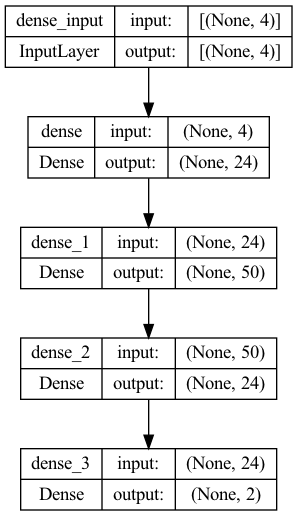

In [3]:
# Create the model
model = Sequential()
model.add(Dense(24, input_dim = 4, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(2, activation='softmax'))
print(model.summary())
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [4]:
# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(feats_train, Y_train, epochs=400, batch_size=40, verbose=1)

Epoch 1/400


2022-11-19 19:59:01.686434: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-19 19:59:01.844691: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


26/26 [==============================] - 1s 13ms/step - loss: 0.7281 - accuracy: 0.3210
Epoch 2/400
26/26 [==============================] - 0s 10ms/step - loss: 0.6573 - accuracy: 0.6294
Epoch 3/400
26/26 [==============================] - 0s 10ms/step - loss: 0.6085 - accuracy: 0.8268
Epoch 4/400
26/26 [==============================] - 0s 10ms/step - loss: 0.5657 - accuracy: 0.8599
Epoch 5/400
26/26 [==============================] - 0s 9ms/step - loss: 0.5237 - accuracy: 0.8716
Epoch 6/400
26/26 [==============================] - 0s 9ms/step - loss: 0.4811 - accuracy: 0.8726
Epoch 7/400
26/26 [==============================] - 0s 10ms/step - loss: 0.4394 - accuracy: 0.8872
Epoch 8/400
26/26 [==============================] - 0s 10ms/step - loss: 0.3988 - accuracy: 0.9086
Epoch 9/400
26/26 [==============================] - 0s 9ms/step - loss: 0.3595 - accuracy: 0.9290
Epoch 10/400
26/26 [==============================] - 0s 9ms/step - loss: 0.3218 - accuracy: 0.9387
Epoch 11/400
26

KeyboardInterrupt: 

In [5]:
test_results = model.evaluate(feats_val,Y_val, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

11/11 [==============================] - 0s 11ms/step - loss: 0.0248 - accuracy: 0.9913
Test results - Loss: 0.02477964572608471 - Accuracy: 0.991253674030304%


2022-11-19 19:59:16.342104: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
